Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4613 - loss: 1.3457 - mse: 0.4396 - val_accuracy: 0.6000 - val_loss: 1.0502 - val_mse: 0.3334
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4853 - loss: 1.2324 - mse: 0.4143 - val_accuracy: 0.6000 - val_loss: 0.9787 - val_mse: 0.3245
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4499 - loss: 1.1659 - mse: 0.4089 - val_accuracy: 0.6000 - val_loss: 0.9228 - val_mse: 0.3169
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4139 - loss: 1.1168 - mse: 0.4085 - val_accuracy: 0.6000 - val_loss: 0.8818 - val_mse: 0.3111
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4689 - loss: 0.9909 - mse: 0.3650 - val_accuracy: 0.6400 - val_loss: 0.8518 - val_mse: 0.3065
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4914 - loss: 0.8881 - mse: 0.3259 - val_accuracy: 0.6000 - val_loss: 0.8307 - val_mse: 0.3033
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - 

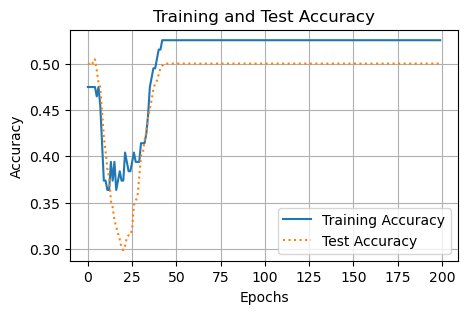

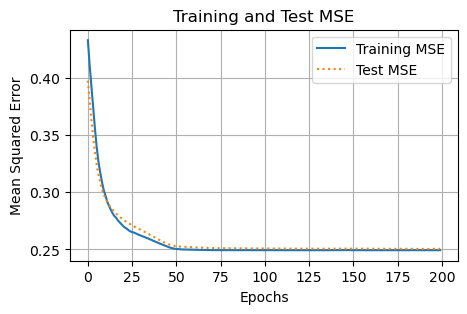

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

# Function to load the dataset
def load_monk_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                parts = line.strip().split()  # Split by spaces
                target = int(parts[0])  # First column is the target
                features = list(map(int, parts[1:7]))  # Next six columns are features
                data.append([target] + features)
    return np.array(data)

# Load train and test datasets
train_data = load_monk_data("monks-1.train")
test_data = load_monk_data("monks-1.test")

# Extract features and target
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(2, input_dim=6, activation='relu'),  # Hidden layer with 10 neurons
    Dense(1, activation='sigmoid')             # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005), 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'mse'])

# Custom callback to track test metrics at each epoch
class TestMetricsCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_accuracy = []
        self.test_mse = []

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc, test_mse = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_accuracy.append(test_acc)
        self.test_mse.append(test_mse)

# Instantiate the callback
test_metrics_callback = TestMetricsCallback((X_test, y_test))

# Train the model with the callback
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=200, batch_size=22, callbacks=[test_metrics_callback])

# Plot training and test accuracy
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(test_metrics_callback.test_accuracy, linestyle='dotted', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and test MSE
plt.figure(figsize=(5, 3))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(test_metrics_callback.test_mse, linestyle='dotted', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()